In [18]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
# Load the dataset
filepath = "/workspaces/AIML316-ADML/Mall_Customers.csv"
df = pd.read_csv(filepath)

# Display initial records and dataset info
print("Head of dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())
print("\nMissing values in each column:")
print(df.isnull().sum())

Head of dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Summary statistics

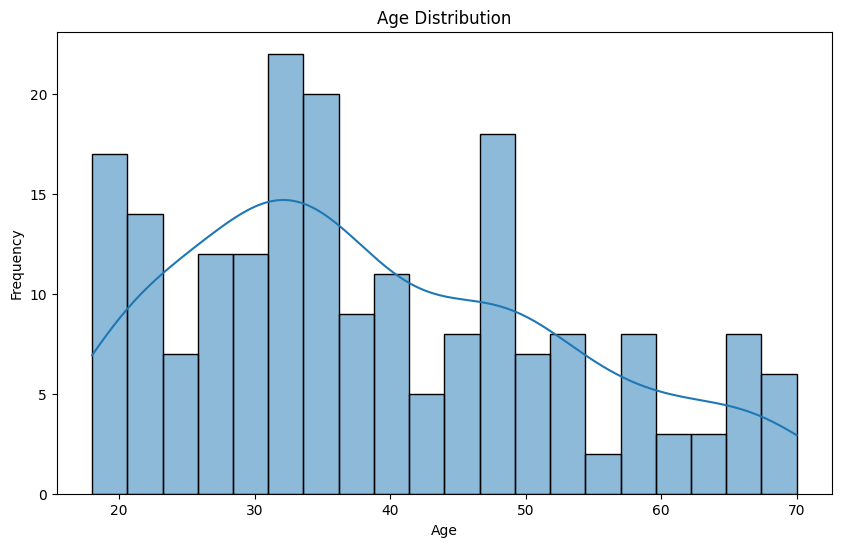

In [20]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

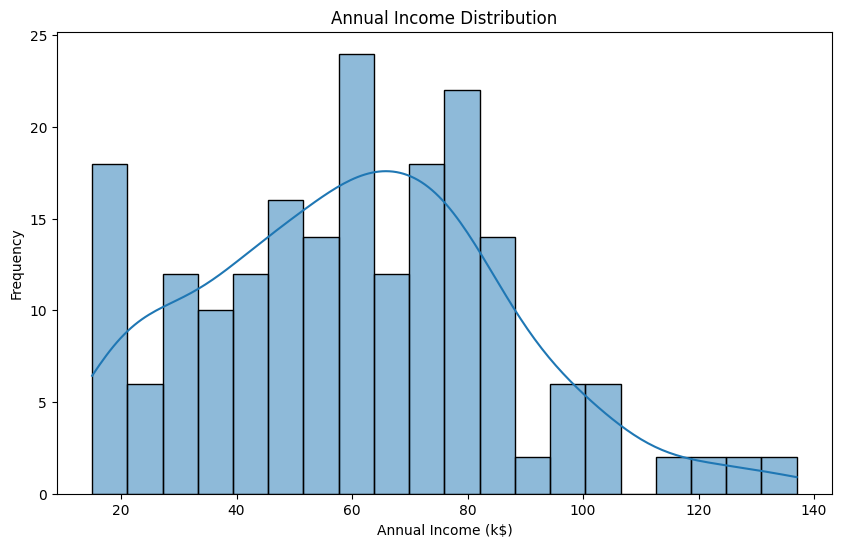

In [21]:
# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.show()

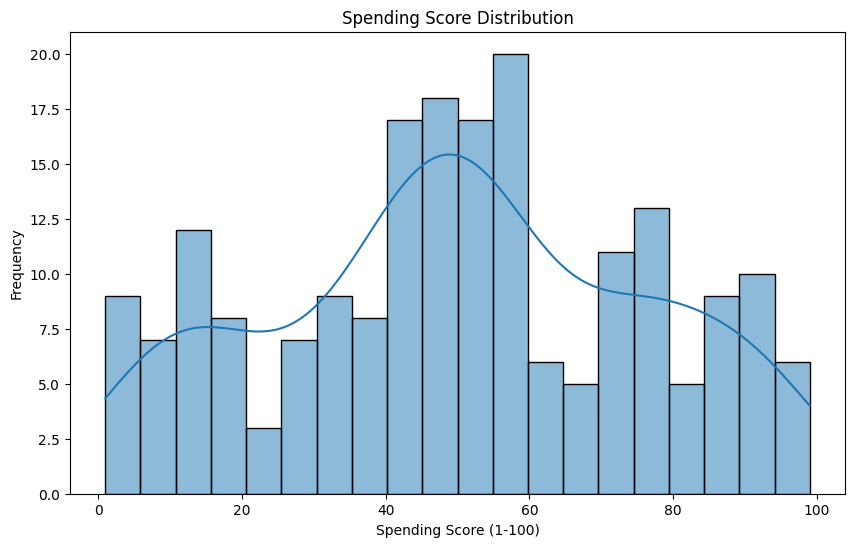

In [22]:
# Distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")
plt.show()

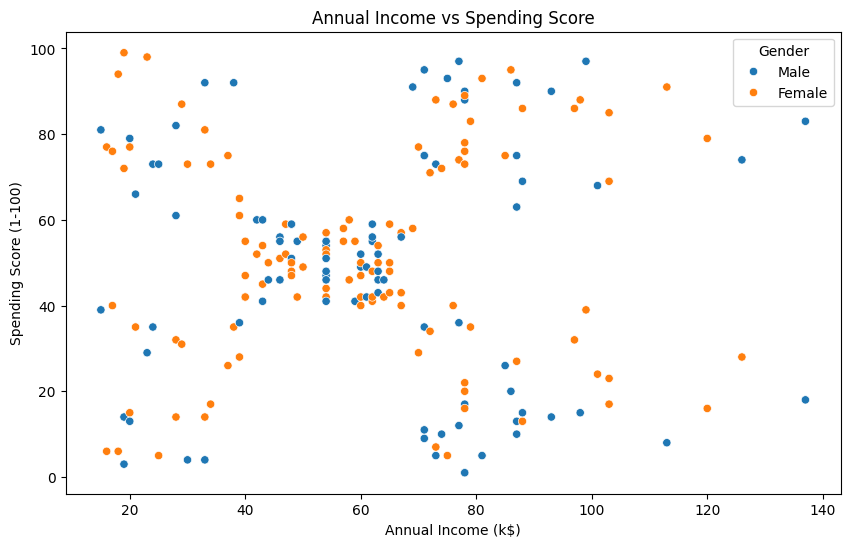

In [23]:
# Scatter plot: Annual Income vs Spending Score, colored by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Annual Income (k$)", 
                y="Spending Score (1-100)", 
                hue="Gender", 
                data=df)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

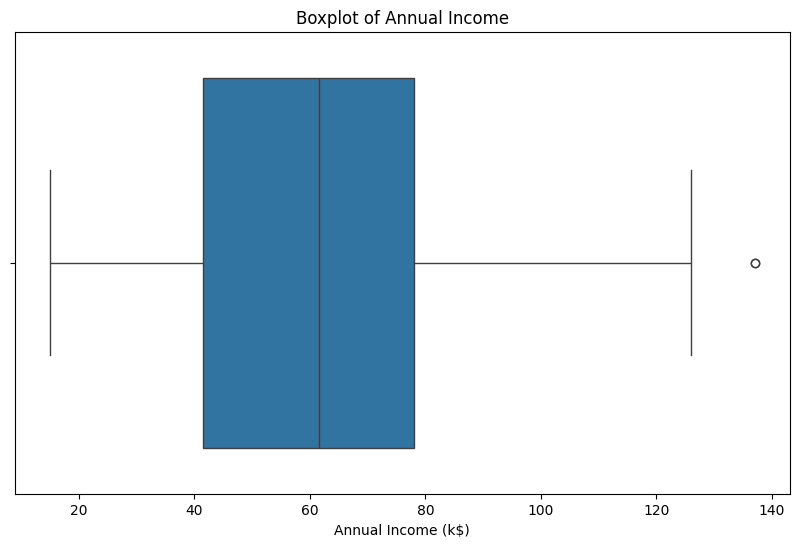

In [24]:
# Boxplot for Annual Income to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Annual Income (k$)"])
plt.title("Boxplot of Annual Income")
plt.xlabel("Annual Income (k$)")
plt.show()


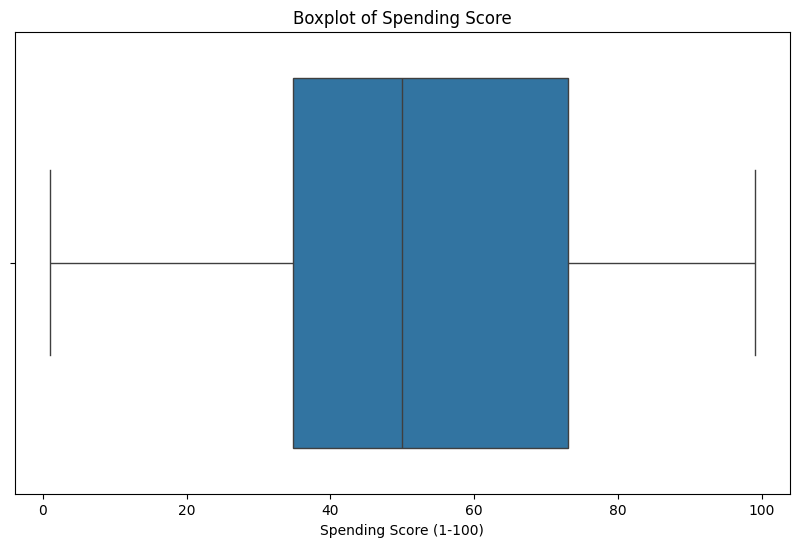

In [25]:
# Boxplot for Spending Score to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Spending Score (1-100)"])
plt.title("Boxplot of Spending Score")
plt.xlabel("Spending Score (1-100)")
plt.show()

### Q2. It is general practice to encode the data before applying ML model. but, while performing clustering encoding should be avoided for binary-valued data?

Encoding is generally important for supervised learning to convert categorical features into numerical ones. However, when it comes to clustering, especially with binary-valued data, applying encoding techniques (like one-hot encoding or label encoding) may unnecessarily alter the feature space. Binary features (with values such as 0 and 1) already provide the necessary information and encoding them can sometimes distort the distance metrics used in clustering algorithms. In other words, if your binary data is already in a numerical format, it's often best to leave it as is for clustering tasks.

### Q3: Show gender wise distribution af customers using histogram and pie chrat

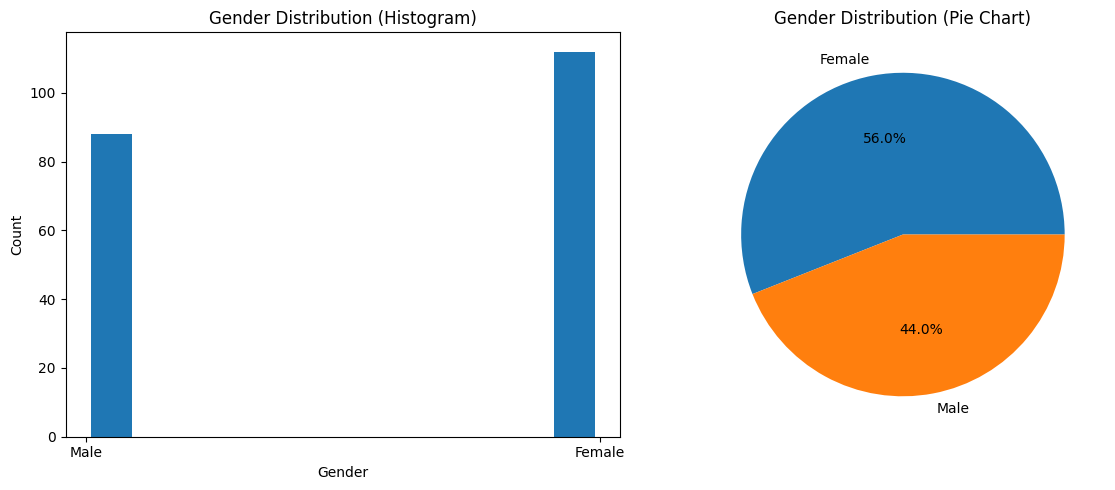

In [26]:
# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['Gender'], rwidth=0.8)
plt.title('Gender Distribution (Histogram)')
plt.xlabel('Gender')
plt.ylabel('Count')

# Pie Chart
plt.subplot(1, 2, 2)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution (Pie Chart)')

# Adjust layout and display
plt.tight_layout()
plt.show()

### Q4: Should standardization to be performed in case of clustering model? explain with reason?

Standardization is generally recommended when working with clustering models, especially for features that have different scales. This is because clustering algorithms like KMeans rely on distance calculations, and if one feature has a much larger scale than another, it can dominate the distance metric and bias the clusters. However, for binary or already standardized data, standardization may not provide additional benefits.

### Q5: compare average annual income and median annual income of the customers

Average Annual Income: $60.56k
Median Annual Income: $62k


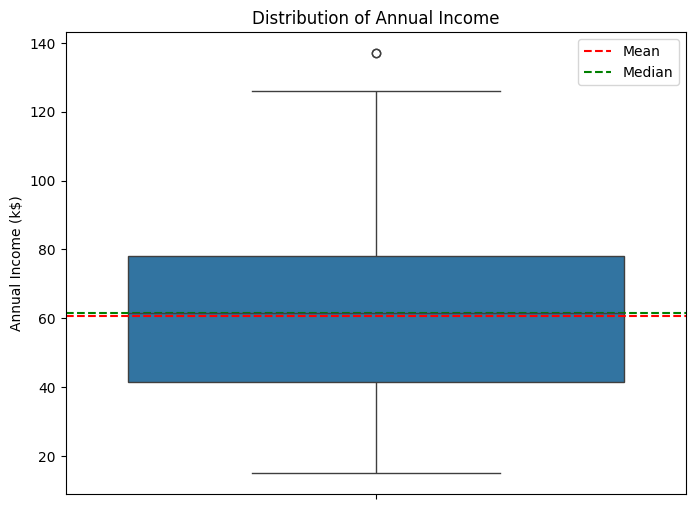

In [27]:
# Calculate average and median annual income
average_income = df['Annual Income (k$)'].mean()
median_income = df['Annual Income (k$)'].median()

print(f"Average Annual Income: ${average_income:.2f}k")
print(f"Median Annual Income: ${median_income:.0f}k")

# Create a box plot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Annual Income (k$)'])
plt.title('Distribution of Annual Income')
plt.ylabel('Annual Income (k$)')
plt.axhline(y=average_income, color='r', linestyle='--', label='Mean')
plt.axhline(y=median_income, color='g', linestyle='--', label='Median')
plt.legend()
plt.show()

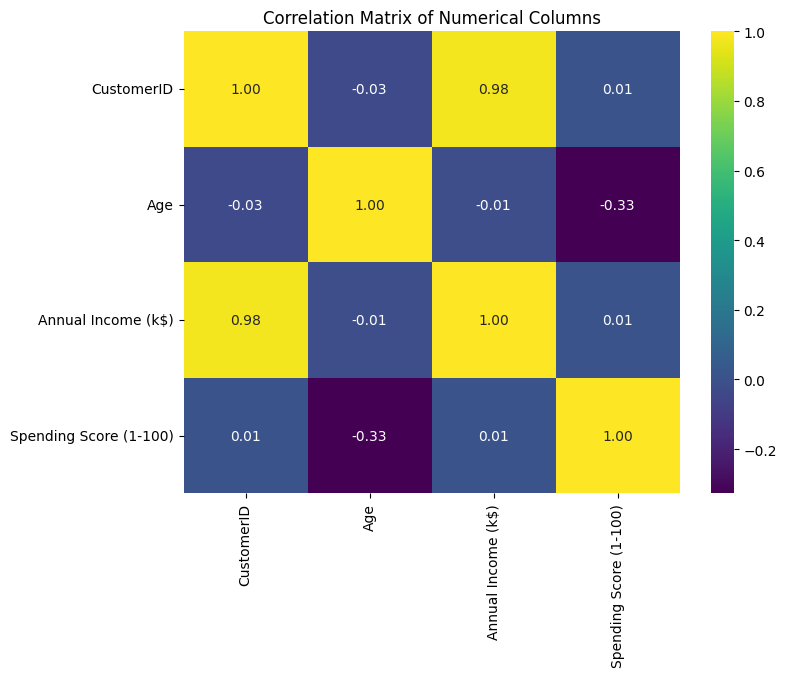

In [29]:
# Compute the correlation matrix for numerical columns by selecting only numeric data
corr_matrix = df.select_dtypes(include=['number']).corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
inertias = []
silhouette_scores = []
k_range = range(2, 11)

print("Training process:")
for k in k_range:
    print(f"\nTraining KMeans with k = {k}")
    kmeans = KMeans(n_clusters=k, random_state=42, verbose=0)
    kmeans.fit(X_scaled)
    inertia = kmeans.inertia_
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    inertias.append(inertia)
    silhouette_scores.append(sil_score)
    print(f"Finished training for k = {k}: inertia = {inertia:.2f}, silhouette score = {sil_score:.4f}")


Training process:

Training KMeans with k = 2
Finished training for k = 2: inertia = 273.67, silhouette score = 0.3973

Training KMeans with k = 3
Finished training for k = 3: inertia = 157.70, silhouette score = 0.4666

Training KMeans with k = 4
Finished training for k = 4: inertia = 109.23, silhouette score = 0.4943

Training KMeans with k = 5
Finished training for k = 5: inertia = 65.57, silhouette score = 0.5547

Training KMeans with k = 6
Finished training for k = 6: inertia = 60.13, silhouette score = 0.5138

Training KMeans with k = 7
Finished training for k = 7: inertia = 49.67, silhouette score = 0.5020

Training KMeans with k = 8
Finished training for k = 8: inertia = 37.32, silhouette score = 0.4550

Training KMeans with k = 9
Finished training for k = 9: inertia = 32.50, silhouette score = 0.4567

Training KMeans with k = 10
Finished training for k = 10: inertia = 30.06, silhouette score = 0.4448


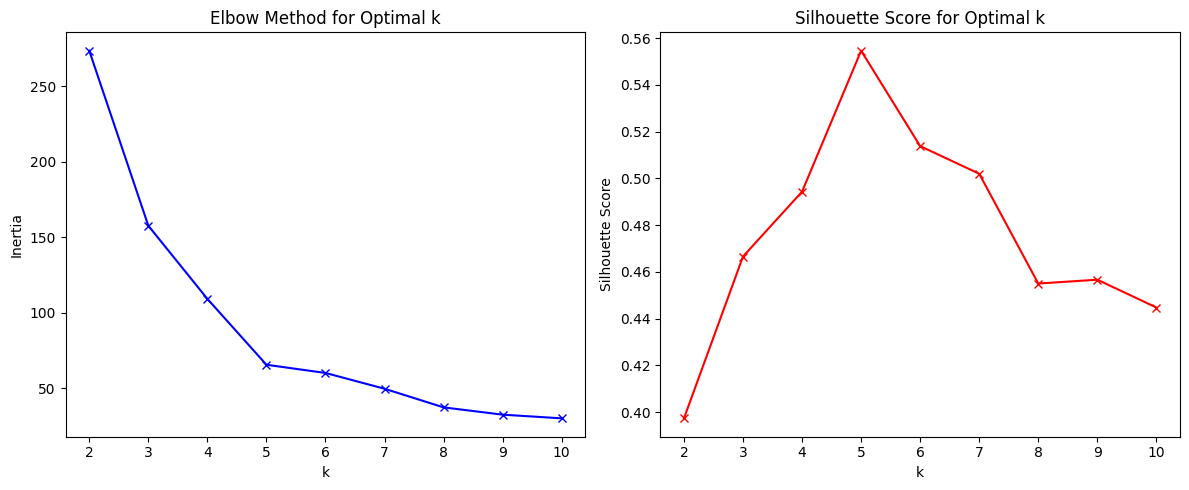

In [32]:
# Plot Elbow Curve
plt.figure(figsize=(12, 5))

# Elbow curve
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Silhouette score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()

### Write about different parameters in KElbowvisualizer 

The KElbowVisualizer in Yellowbrick has several important parameters:

1. **k**: The number of clusters to form. Defines the range of k values to test.

2. **metric**: The scoring metric to evaluate model fit:
    - 'distortion': Within-cluster sum of squares
    - 'silhouette': Silhouette coefficient
    - 'calinski_harabasz': Calinski-Harabasz score
    - 'davies_bouldin': Davies-Bouldin score

3. **timings**: Boolean flag indicating if timing data should be shown.

4. **locate_elbow**: Boolean indicating if the "elbow" should be automatically detected.

5. **random_state**: Integer seed for random number generation.

6. **size**: Tuple specifying the size of the figure to plot.

7. **n_jobs**: Number of jobs to run in parallel during clustering.

8. **ax**: Matplotlib axes to plot on.

These parameters help customize the elbow curve visualization and the underlying KMeans clustering process to find the optimal number of clusters.

### Label the clusters generated by k means clustering 

Based on the elbow curve and silhouette scores shown in the previous cells, let's train the final KMeans model with 5 clusters and label the data:

The cluster labels represent different customer segments based on Annual Income and Spending Score. The mall can target their marketing strategies based on these distinct customer segments:

1. Low Income, Low Spending: Budget-conscious customers
2. Low Income, High Spending: Value seekers
3. Average Income & Spending: Standard customers
4. High Income, Low Spending: Conservative spenders
5. High Income, High Spending: Premium customers

These segments provide valuable insights for targeted marketing strategies and personalized customer approaches.

Number of clusters found (excluding noise): 2


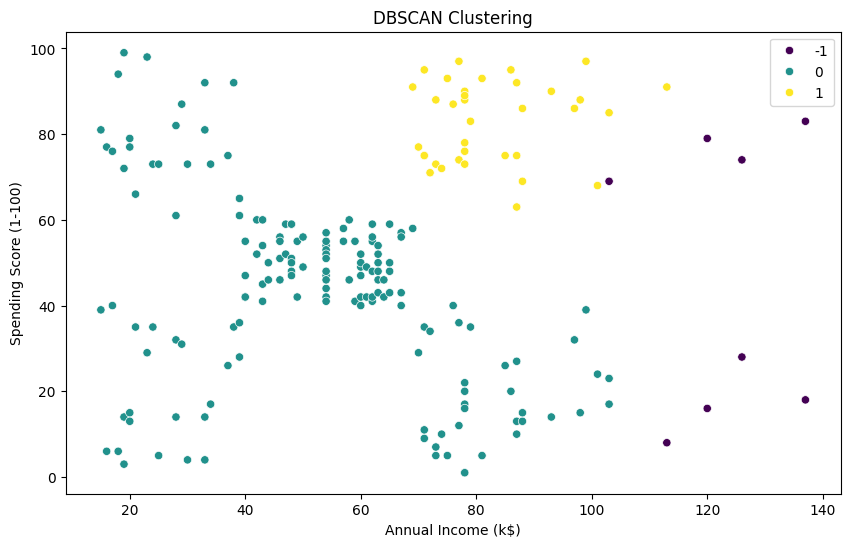

In [34]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with chosen parameters.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Print the number of clusters (excluding noise points labeled as -1)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found (excluding noise): {n_clusters}")

# Plot the DBSCAN clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Annual Income (k$)'], 
                y=X['Spending Score (1-100)'], 
                hue=dbscan_labels, 
                palette="viridis", 
                legend="full")
plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

### what are the disadvantages of DBSCAN 
- DBSCAN requires careful tuning of its parameters (eps and min_samples), and choosing inappropriate values can lead to poor clustering results.
- It does not perform well when clusters vary in density since a single global eps might not capture the structure of different clusters.
- High-dimensional datasets can reduce the effectiveness of the distance metrics, leading to unreliable clustering.
- DBSCAN may classify some points at the border of clusters or in overlapping areas as noise, even if they belong to a cluster.